In [1]:

from keras.utils.vis_utils import model_to_dot
import os
import matplotlib.pyplot as plot
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec

Using TensorFlow backend.


In [2]:
def get_pictures(folder):
    Images= []
    Labels = []
    label =0
    for labels in os.listdir(folder):
        if labels == 'angry':
            label = 0
        elif labels == 'disgust':
            label =1
        elif labels == 'fear':
            label = 2
        elif labels == 'happy':
            label = 3
        elif labels == 'neutral':
            label = 4
        elif labels == 'sad':
            label = 5
        elif labels == 'surprise':
            label = 6
        for images in os.listdir(folder+labels):
            try:
                image = cv2.imread(folder+labels+r'/'+images)
                image = cv2.resize(image, (100,100))
                Images.append(image)
                Labels.append(label)
            except:
                None
    return shuffle(Images, Labels, random_state= 12863686)

def get_labels(code):
    labels = {0:"angry", 1:"disgust", 2:"fear", 3:"happy", 4:"neutral", 5:"sad", 6:"surprise"}
    
    return labels[code]

In [3]:
Images, Labels = get_pictures(r'A:\99505_234911_bundle_archive\images\images\train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

In [4]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (28821, 100, 100, 3)
Shape of Labels: (28821,)


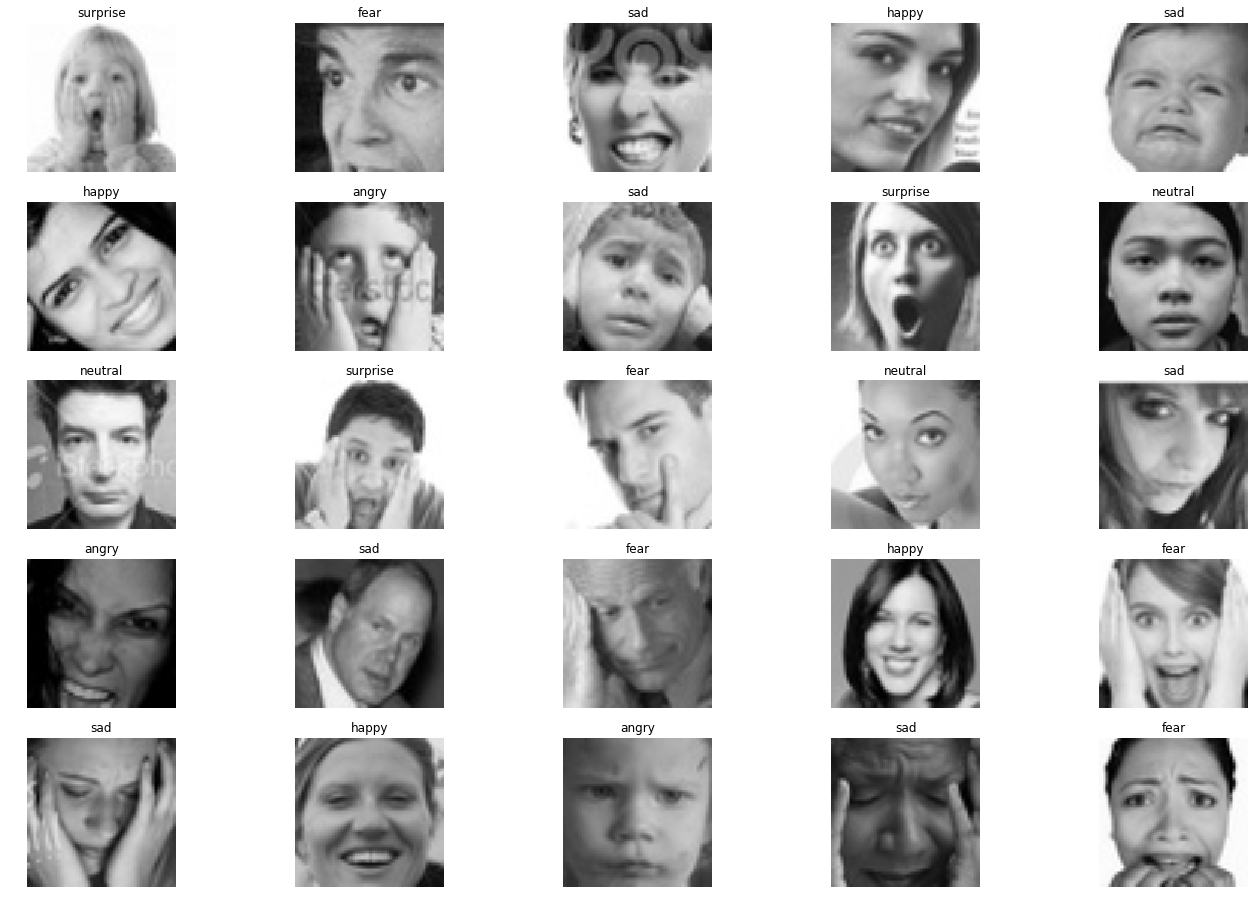

In [5]:
f,ax = plot.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(Images))
        ax[i,j].imshow(Images[rnd_number])
        ax[i,j].set_title(get_labels(Labels[rnd_number]))
        ax[i,j].axis('off')

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization, Activation, GlobalAveragePooling2D
from matplotlib import pyplot as plt
import tensorflow

In [7]:
new_images =[]
for i in Images:
    image= cv2.cvtColor(i, cv2.COLOR_BGR2GRAY )
    new_images.append(image)
new_images =  np.array(new_images)
new_images = np.expand_dims(new_images, axis=-1)
print(new_images.shape)

(28821, 100, 100, 1)


In [8]:
def model5(input_size,output_size):
    model = Sequential()

    model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (input_size[0], input_size[1], input_size[2])))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))


    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Conv2D(128, (3, 3), padding = 'same',activation='relu'))
    model.add(BatchNormalization())
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(output_size, activation='softmax'))

    model.compile(loss=tensorflow.keras.losses.sparse_categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [9]:
img_rows, img_cols = 100,100
model = model5([img_rows, img_cols,1],7)

In [ ]:
history_model = trained = model.fit(new_images,Labels,epochs=30,validation_split=0.20)

Train on 23056 samples, validate on 5765 samples
Epoch 1/30
23056/23056 [==============================] - 1112s 48ms/sample - loss: 6.2232 - accuracy: 0.2543 - val_loss: 4.9450 - val_accuracy: 0.2786
Epoch 2/30
23056/23056 [==============================] - 1072s 47ms/sample - loss: 3.9592 - accuracy: 0.3293 - val_loss: 2.6461 - val_accuracy: 0.3676
Epoch 3/30
23056/23056 [==============================] - 1100s 48ms/sample - loss: 2.8896 - accuracy: 0.3686 - val_loss: 1.6326 - val_accuracy: 0.3825
Epoch 4/30
23056/23056 [==============================] - 1001s 43ms/sample - loss: 2.0940 - accuracy: 0.3996 - val_loss: 1.7337 - val_accuracy: 0.4024
Epoch 5/30
23056/23056 [==============================] - 1237s 54ms/sample - loss: 1.5844 - accuracy: 0.4442 - val_loss: 1.4938 - val_accuracy: 0.4394
Epoch 6/30
23056/23056 [==============================] - 1233s 53ms/sample - loss: 1.3918 - accuracy: 0.4735 - val_loss: 1.5182 - val_accuracy: 0.4222
Epoch 7/30
23056/23056 [===============

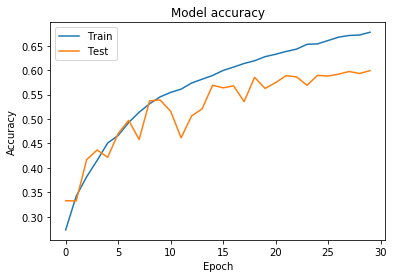

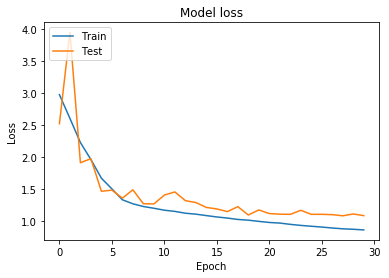

In [10]:
# #Plot the graph for accuracy and loss for better understanding
plot.plot(trained.history['accuracy'])
plot.plot(trained.history['val_accuracy'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [11]:
#use some images for model to predict them, I created a folder and stored some images for prediction
pred_images,no_labels = get_pictures(r'A:\99505_234911_bundle_archive\images\images\validation/')
pred_images = np.array(pred_images)
pred_images.shape
# classes = ("Parasitized, Uninfected")

(7066, 48, 48, 3)

In [12]:
predictions = model.predict(pred_images)

In [13]:
print(get_labels(np.argmax(predictions[5])))

surprise


C:\Users\vibhu\Anaconda3\lib\site-packages\matplotlib\figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


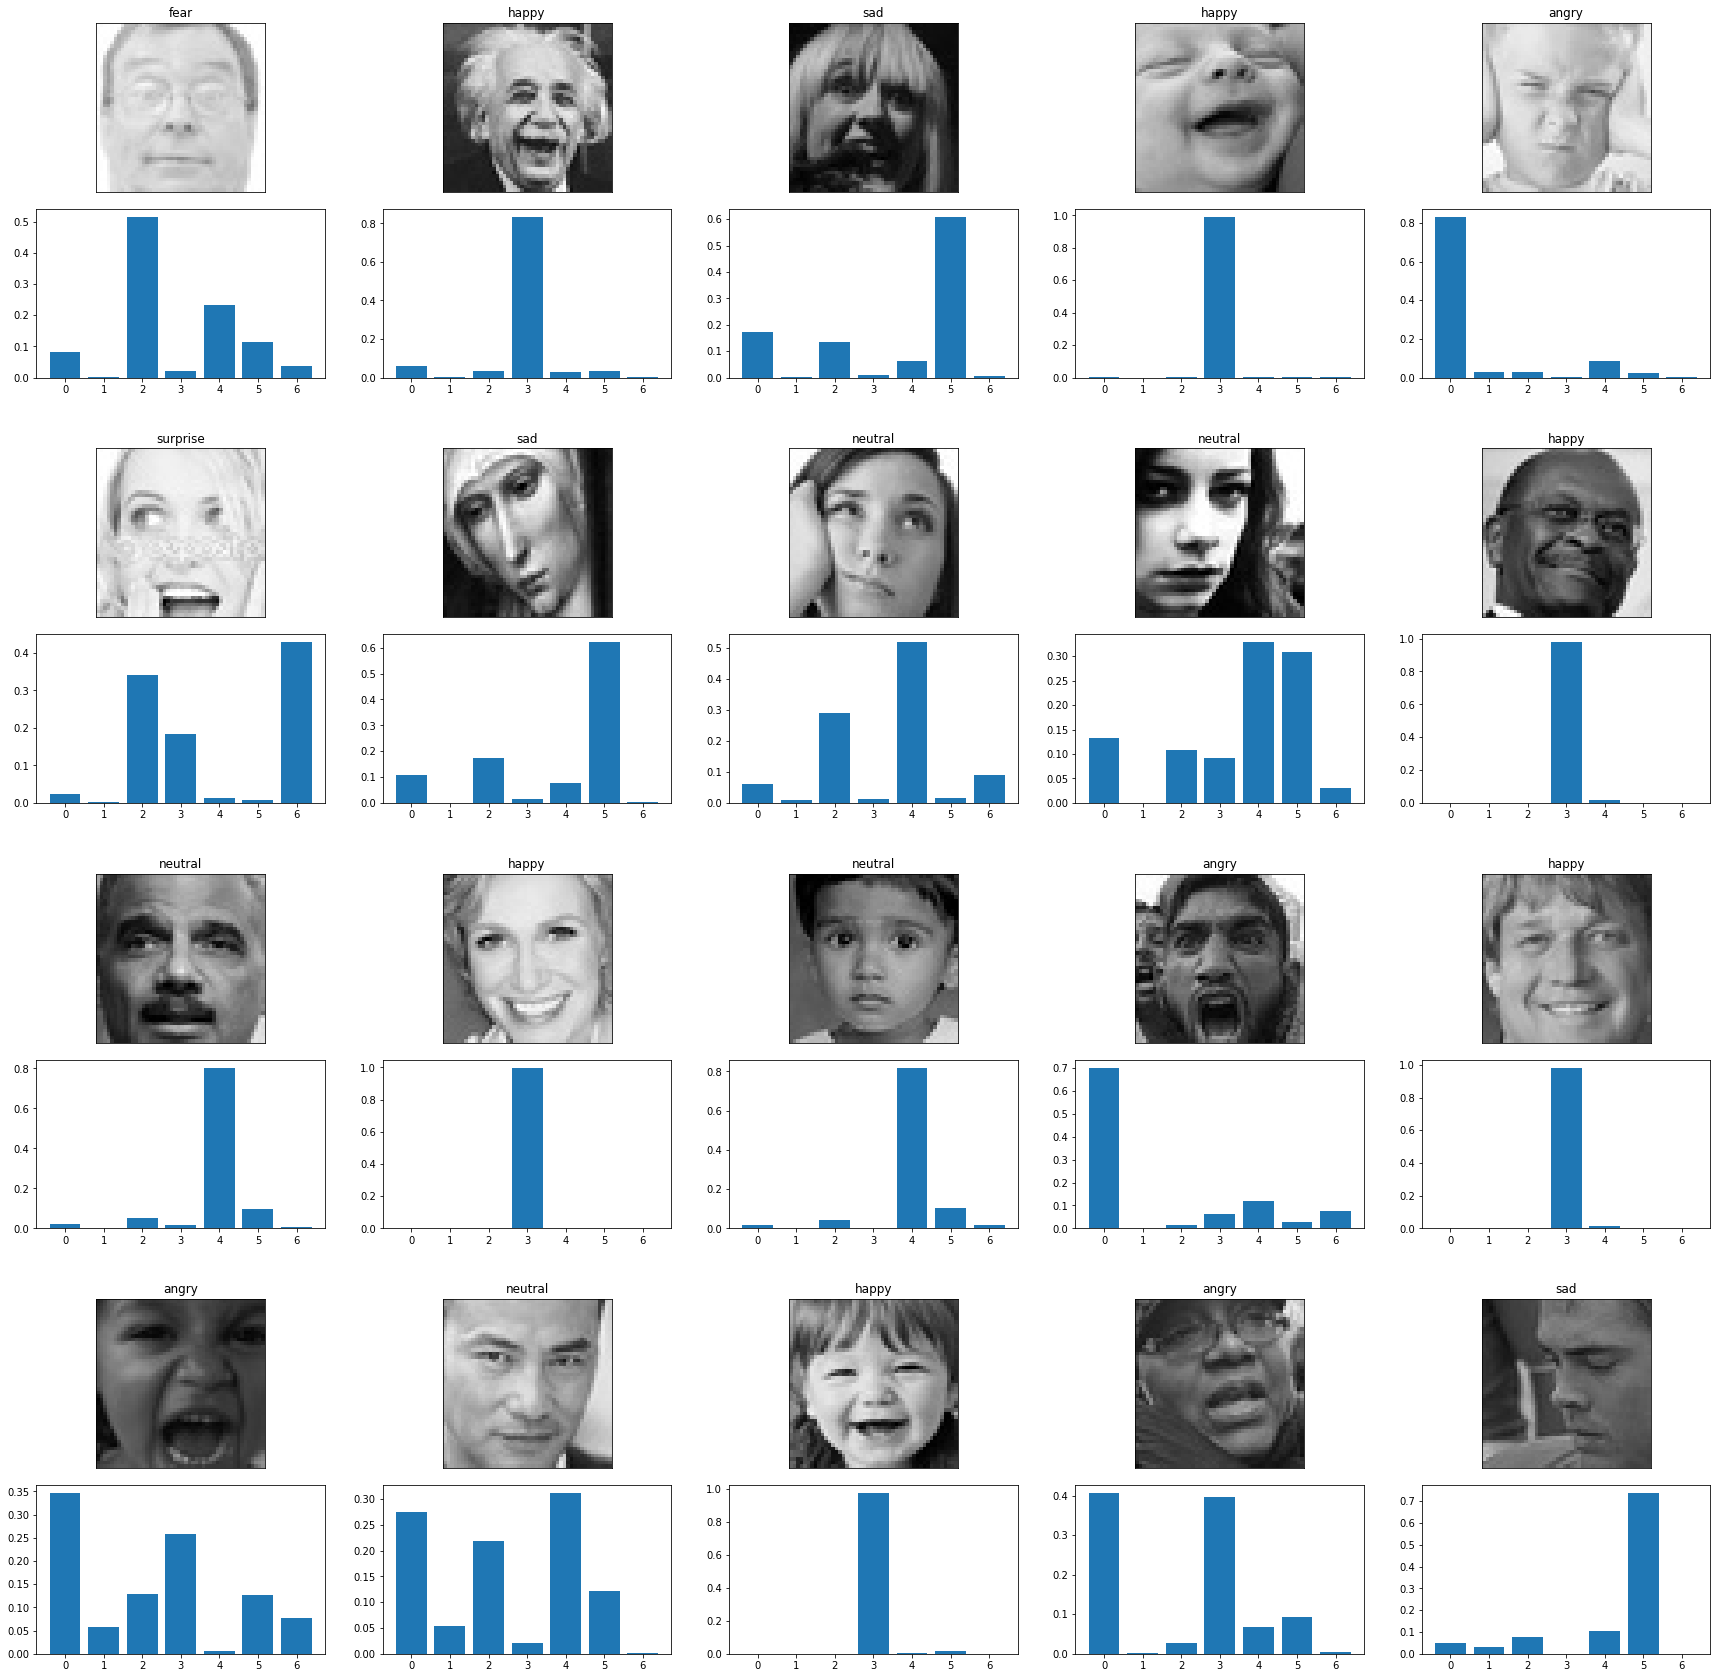

In [16]:
fig = plot.figure(figsize=(30, 30))
outer = gridspec.GridSpec(4, 5, wspace=0.2, hspace=0.2)

for i in range(20):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_labels(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(7)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5,6],pred_prob)
            fig.add_subplot(ax)


fig.show()